# QF 627 Programming and Computational Finance
## Lesson 05 | Stock Trading Strategies | `xzj`view

> 👋 Hi Team,

> This week’s lesson will discuss the development of a simple `momentum` strategy. We’ll go through that development step by step, firstly by formulating and programming a simple algorithmic trading strategy. We’ll then backtest our strategy, assessing its performance with the `pandas` library.

### Lesson Pointers 👆

* [Today, we will begin with a refresher on rolling statistics.](#rolling)

<br>

* [We will then dive in and build a trading strategy.](#trading)

<br>

* [To conclude, we will conduct backtesting to assess the trading strategy.](#backtesting)

### Activation of necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Let's obtain historical stock data

- Facebook
- Amazon
- Apple
- Netflix
- Alphabet

In [3]:
from pandas_datareader import data as pdr
import datetime
import yfinance as yf

In [4]:
stocks = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [5]:
def extraction(stocks, start, end):
    def data(ticker):
        return(pdr.get_data_yahoo(ticker,
                                  start = start,
                                  end = end)
              )
    FAANG_stock = map(data, stocks)
    return(pd.concat(FAANG_stock,
                     keys = stocks,
                     names = ["Company", "Date"]
                    )
          )

In [6]:
FAANG = extraction(stocks,
                   datetime.datetime(2014, 9, 1),
                   datetime.datetime(2021, 8, 31)
                  )

In [7]:
FAANG.tail()

High          Low         Open        Close  \
Company Date                                                             
GOOG    2021-08-25  2866.260010  2848.790039  2857.659912  2859.000000   
        2021-08-26  2862.696045  2841.830078  2852.370117  2842.459961   
        2021-08-27  2900.219971  2840.399902  2842.250000  2891.010010   
        2021-08-30  2929.790039  2892.000000  2894.090088  2909.389893   
        2021-08-31  2922.239990  2900.000000  2917.689941  2909.239990   

                       Volume    Adj Close  
Company Date                                
GOOG    2021-08-25   641900.0  2859.000000  
        2021-08-26   746100.0  2842.459961  
        2021-08-27  1228100.0  2891.010010  
        2021-08-30   845800.0  2909.389893  
        2021-08-31  1337800.0  2909.239990

<a id="rolling"></a>
### A Refresher on `Rolling Statistics`

In [8]:
Daily_Closing_Prices = FAANG[["Adj Close"]].reset_index().pivot("Date",
                                                                "Company",
                                                                "Adj Close")
Daily_Closing_Prices

Company,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2014-09-02,23.314182,342.380005,76.680000,575.749268,68.085716
2014-09-03,22.330153,339.000000,75.830002,576.357605,68.198570
2014-09-04,22.145086,345.950012,75.949997,580.386536,67.524284
2014-09-05,22.336929,346.380005,77.260002,584.475342,67.954285
2014-09-08,22.199249,342.339996,77.889999,588.105347,68.475716
...,...,...,...,...,...
2021-08-25,148.360001,3299.179932,368.390015,2859.000000,547.580017
2021-08-26,147.539993,3316.000000,364.380005,2842.459961,550.119995
2021-08-27,148.600006,3349.629883,372.630005,2891.010010,558.919983


In [9]:
AMZN = Daily_Closing_Prices[["AMZN"]]
AMZN

Company,AMZN
Date,
2014-09-02,342.380005
2014-09-03,339.000000
2014-09-04,345.950012
2014-09-05,346.380005
2014-09-08,342.339996
...,...
2021-08-25,3299.179932
2021-08-26,3316.000000
2021-08-27,3349.629883


In [10]:
window = 40

In [11]:
# mean()

AMZN["mean"] = Daily_Closing_Prices[["AMZN"]].rolling(window = window).mean()

<ipython-input-11-7ed92b0c7283>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN["mean"] = Daily_Closing_Prices[["AMZN"]].rolling(window = window).mean()


In [12]:
# min()

AMZN["min"] = Daily_Closing_Prices[["AMZN"]].rolling(window = window).min()

<ipython-input-12-df5c97e51a80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN["min"] = Daily_Closing_Prices[["AMZN"]].rolling(window = window).min()


In [13]:
# max()

AMZN["max"] = Daily_Closing_Prices[["AMZN"]].rolling(window = window).max()

<ipython-input-13-956880f007ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN["max"] = Daily_Closing_Prices[["AMZN"]].rolling(window = window).max()


In [14]:
# median()

AMZN["median"] = Daily_Closing_Prices[["AMZN"]].rolling(window = window).median()

In [15]:
# std()

AMZN["std"] = Daily_Closing_Prices[["AMZN"]].rolling(window = window).std()

In [16]:
# Question? How to calculate the Exponentially Weighted Moving average

AMZN["EWM"] = Daily_Closing_Prices[["AMZN"]].ewm(halflife = 0.5,
                                                 min_periods = window).mean()

In [17]:
AMZN.dropna().head()

Company,AMZN,mean,min,max,median,std,EWM
Date,,,,,,,
2014-10-27,289.970001,320.893751,287.059998,346.380005,322.570007,13.428651,290.871412
2014-10-28,295.589996,319.724001,287.059998,346.380005,322.320007,13.546413,294.410350
2014-10-29,294.119995,318.602000,287.059998,346.380005,322.065002,13.765762,294.192584
2014-10-30,299.070007,317.430000,287.059998,346.380005,321.875000,13.367578,297.850651
2014-10-31,305.459991,316.407000,287.059998,342.339996,320.115005,12.641315,303.557656


> Let's visualize three rolling statistics for the most recent 200 data points.

> Also, let's `add the original time series data to our plot`.

<AxesSubplot:xlabel='Date'>

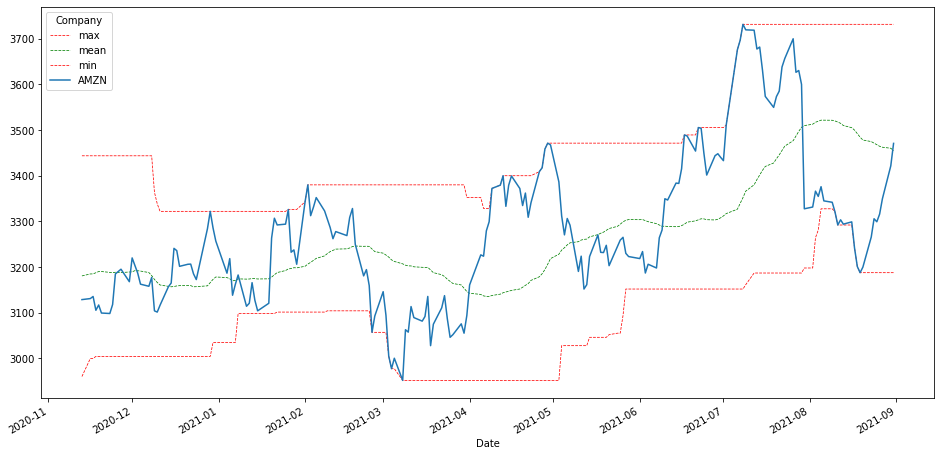

In [18]:
ax = AMZN[["max", "mean", "min"]].iloc[-200:].plot(figsize = (16, 8),
                                                   style = ["r--", "g--", "r--"],
                                                   lw = 0.75)

Daily_Closing_Prices[["AMZN"]].iloc[-200:].plot(ax = ax,
                                                lw = 1.5)

### Rolling Statistics

> `Rolling statistics` are useful in the `technical analysis` of stocks. Their use can be compared to `fundamental analysis`, which focuses on financial reports and the strategic positions of the company whose stock is being examined.

> The use of `two simple moving averages` (SMAs) is a basic trading strategy based on technical analysis.

•	A trader should go `long` on a stock (or any financial instrument in general) when its `shorter-term SMA is above its longer-term SMA`, and should go short when the opposite holds true.

•	This concept can easily be implemented with `pandas`, thanks to the `DataFrame object`.

> Rolling statistics are generally used only when there is enough data, given the window parameter specification.

#### Let's calculate the values for the shorter-term and longer-term SMAs.

> Then visualize the stock price data, along with the two SMA time series.

In [19]:
Daily_Closing_Prices["shorter_MA"] = Daily_Closing_Prices[["AMZN"]].rolling(window = 20).mean()

Daily_Closing_Prices["longer_MA"] = Daily_Closing_Prices[["AMZN"]].rolling(window = 100).mean()

<AxesSubplot:xlabel='Date'>

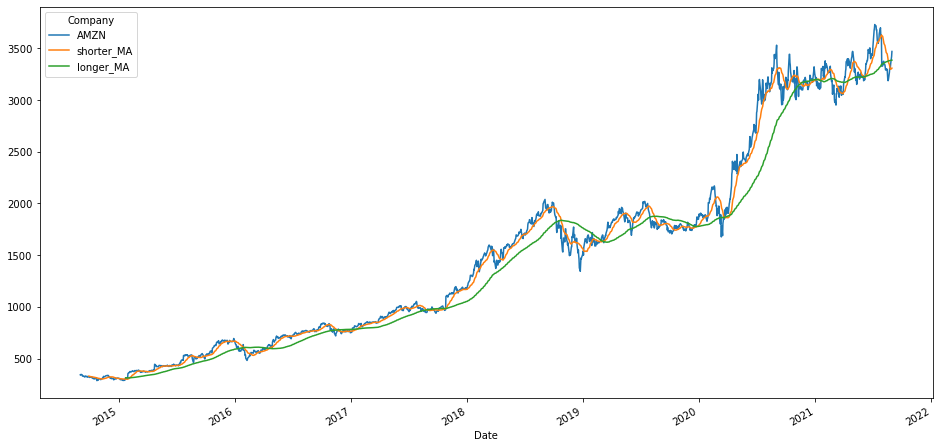

In [20]:
Daily_Closing_Prices[["AMZN", "shorter_MA", "longer_MA"]].plot(figsize = (16, 8))

> Here, the SMAs can be used to generate positions to implement a trading strategy.

> Building a trading strategy will be discussed below. But here, let’s visualize a long position by a value of 1 and a short position by a value of –1.

> The change in the position can be visually detected, when the two lines representing the SMA time series cross.

In [21]:
Daily_Closing_Prices.dropna(inplace = True)

In [22]:
# Create a column (Trading_Positions)

Daily_Closing_Prices["Trading_Positions"] = np.where(Daily_Closing_Prices["shorter_MA"] <
                                                     Daily_Closing_Prices["longer_MA"],
                                                     -1, 1)

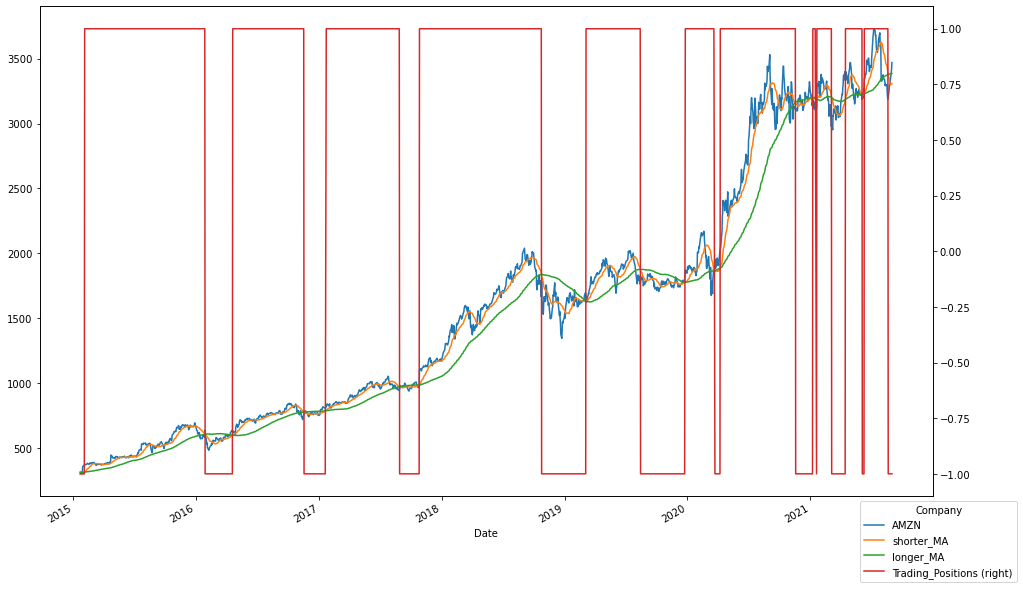

In [23]:
ax = Daily_Closing_Prices[["AMZN",
                           "shorter_MA",
                           "longer_MA",
                           "Trading_Positions"]].plot(figsize = (16, 10),
                                                      secondary_y = "Trading_Positions"
                                                      )

ax.get_legend().set_bbox_to_anchor((1.10, .00))

<a id="trading"></a>
### A Gentle Introduction to Stock Trading Strategies: A Simple Momentum Trading Strategy

In [24]:
BAC = pdr.get_data_yahoo("BAC",
                        start = datetime.datetime(2013, 9, 1),
                        end = datetime.datetime(2021, 8, 31))
BAC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-25,42.450001,41.540001,41.660000,42.150002,51219900.0,41.935108
2021-08-26,42.840000,42.020000,42.500000,42.040001,41184500.0,41.825668
2021-08-27,42.650002,41.939999,42.119999,42.490002,46455500.0,42.273373
2021-08-30,42.630001,41.630001,42.630001,41.660000,44855600.0,41.447601
2021-08-31,42.070000,41.360001,41.669998,41.750000,54654600.0,41.537144


In [25]:
FB = pdr.get_data_yahoo("FB",
                        start = datetime.datetime(2013, 9, 1),
                        end = datetime.datetime(2021, 8, 31))
FB.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-25,370.859985,365.399994,365.600006,368.390015,9684500,368.390015
2021-08-26,369.440002,364.130005,368.380005,364.380005,7888700,364.380005
2021-08-27,373.739990,364.079987,365.100006,372.630005,11214200,372.630005
2021-08-30,381.489990,370.519989,372.559998,380.660004,13547300,380.660004
2021-08-31,382.760010,378.799988,379.950012,379.380005,12345400,379.380005


> Building a trading strategy requires multiple stages of work. As you will see later in our course, when you learn about machine learning (no pun intended here), building a trading strategy is an iterative process of training, tuning, optimizing, and assessing the performance of your model.

> As a starting point in learning about stock trading strategies, you will learn momentum strategy (a.k.a. divergence or trend trading). This strategy is based on a theory that movement of a quantity will continue in its current direction. Thus, stocks have momentum, or upward or downward trends, and you can detect and exploit those trends.

#### A moving average crossover and a dual moving average crossover are examples of the momentum strategy.

- The `moving average crossover` is when the price of an asset moves from one side of a moving average to the other. This `crossover` denotes a `change in momentum`, and can be used as the point at which to make the decision to `enter or exit` the market.

<br>

- A `dual moving average crossover` occurs when a short-term average crosses a long-term average. This signal is taken as identifying that momentum is shifting in the direction of the short-term average. A `buy signal` is when the short-term average crosses the long-term average and scores above it. A `sell signal` is presented by a short-term average crossing a long-term average and falling below it.

> Here, when you go long, you think that the stock price will go up and will sell at a higher price in the future (buy signal)

> When you go short, you sell your stock, expecting to be able to buy it back at a lower price and realize a profit (sell signal).

> Below, we will go through the strategy building step by step.

#### Step 1: `Define` two lookback periods, of `short` and `long` duration

> Here we will create two variables and assign one integer per variable.

> It is obvious, but make sure that the integer you assign to the short window is shorter than the integer you assign to the long window variable 🙂

In [26]:
short = 20
long = 60

#### Step 2: Create an empty signals DataFrame

> Make sure to copy the index of your stock data so that we can start calculating the daily buy or sell signal 👀 

In [27]:
BUY_or_SELL = pd.DataFrame(index = BAC.index)
BUY_or_SELL

""
Date
2013-09-03
2013-09-04
2013-09-05
2013-09-06
2013-09-09
...
2021-08-25
2021-08-26
2021-08-27


> You might want to make a column named `BUY_or_SELL` in your empty DataFrame, and set the value for all rows in that column to 0.0.

In [28]:
BUY_or_SELL["BUY_or_SELL"] = 0.0
BUY_or_SELL

,BUY_or_SELL
Date,
2013-09-03,0.0
2013-09-04,0.0
2013-09-05,0.0
2013-09-06,0.0
2013-09-09,0.0
...,...
2021-08-25,0.0
2021-08-26,0.0
2021-08-27,0.0


> Steps 1 and 2 above set the stage for our main work.

#### Step 3: Assign the set of short and long SMAs (over the respective short and long time windows)

> Here, please use the function `rolling()` to initiate your rolling window calculations. 

> Specifically, you will set the following three arguments.

* `window` 
* `min_periods`
* `center`  

> Input either SHORT or LONG, with `1` as the minimum number of data points in the window that are required to have a value, and False, so that the labels are not set at the center of the window.

> Here, don’t forget to chain the function `mean()` so that we can calculate the rolling mean.

In [29]:
BUY_or_SELL["short_SMA"] = BAC["Close"].rolling(window = short,
                                                min_periods = 1,
                                                center = False).mean()

BUY_or_SELL["long_SMA"] = BAC["Close"].rolling(window = long,
                                                min_periods = 1,
                                                center = False).mean()

In [30]:
BUY_or_SELL["short_SMA"] = FB["Close"].rolling(window = short,
                                                min_periods = 1,
                                                center = False).mean()

BUY_or_SELL["long_SMA"] = FB["Close"].rolling(window = long,
                                                min_periods = 1,
                                                center = False).mean()

In [31]:
BUY_or_SELL

,BUY_or_SELL,short_SMA,long_SMA
Date,,,
2013-09-03,0.0,41.869999,41.869999
2013-09-04,0.0,41.824999,41.824999
2013-09-05,0.0,42.103333,42.103333
2013-09-06,0.0,42.565000,42.565000
2013-09-09,0.0,42.860000,42.860000
...,...,...,...
2021-08-25,0.0,360.197002,349.708001
2021-08-26,0.0,360.500002,350.295168
2021-08-27,0.0,361.316502,351.071668


> Now you have calculated the mean average of the short and long windows.

#### Step 4: Create a signal when the short moving average crosses the long moving average

> Note that this is only for the period greater than the shortest moving average window. [Recall that this is the step we performed above during our refresher on rolling statistics.](#rolling)

In [32]:
BUY_or_SELL["BUY_or_SELL"][short:] = np.where(BUY_or_SELL["short_SMA"][short:] >
                                              BUY_or_SELL["long_SMA"][short:],
                                              1.0,
                                              0.0)
BUY_or_SELL

,BUY_or_SELL,short_SMA,long_SMA
Date,,,
2013-09-03,0.0,41.869999,41.869999
2013-09-04,0.0,41.824999,41.824999
2013-09-05,0.0,42.103333,42.103333
2013-09-06,0.0,42.565000,42.565000
2013-09-09,0.0,42.860000,42.860000
...,...,...,...
2021-08-25,1.0,360.197002,349.708001
2021-08-26,1.0,360.500002,350.295168
2021-08-27,1.0,361.316502,351.071668


#### Step 5: Calculate the difference between the signals to make trading orders

> We can differentiate between long and short positions, within the column of our DF, where we are `buying` or `selling` stock.

In [33]:
BUY_or_SELL["our_positions"] = BUY_or_SELL["BUY_or_SELL"].diff()
BUY_or_SELL.tail(50)

,BUY_or_SELL,short_SMA,long_SMA,our_positions
Date,,,,
2021-06-22,1.0,331.896001,316.731499,0.0
2021-06-23,1.0,332.536000,317.560999,0.0
2021-06-24,1.0,333.312000,318.480666,0.0
2021-06-25,1.0,333.742999,319.261332,0.0
2021-06-28,1.0,335.088499,320.210999,0.0
2021-06-29,1.0,336.226500,320.927333,0.0
2021-06-30,1.0,337.154500,321.618166,0.0
2021-07-01,1.0,338.572000,322.306499,0.0
2021-07-02,1.0,339.789500,323.001166,0.0


> Print the signals DataFrame and inspect the results. `Make sure to fully digest what the positions and the signal columns denote in this DF.`

> When you have taken the time to understand the results of the trading strategy, visualize the short and long moving averages, along with the buy and sell signals.

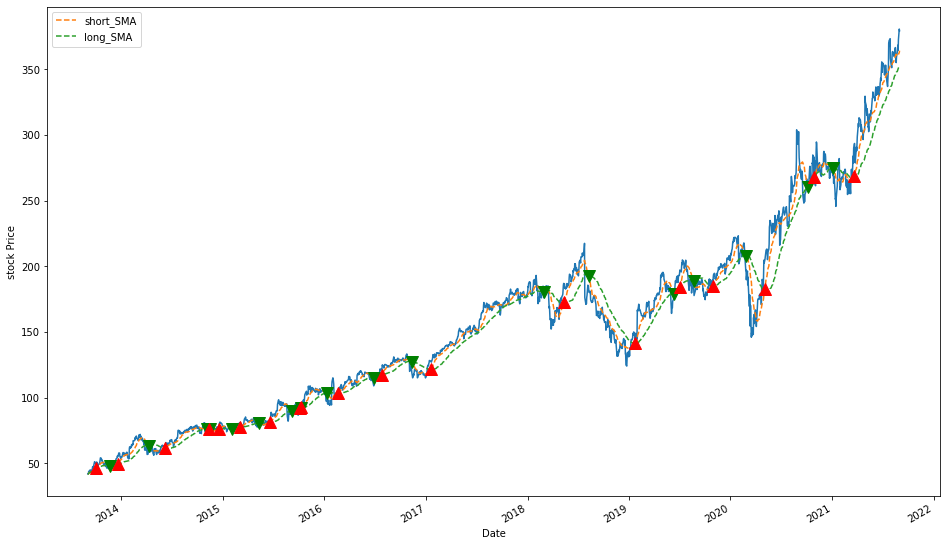

In [34]:
fig = plt.figure(figsize = (16, 10))

sub = fig.add_subplot(111,
                     ylabel = "stock Price")

FB["Close"].plot(ax = sub)

BUY_or_SELL[["short_SMA",
            "long_SMA"]].plot(ax = sub,
                              style = ["--", "--"])

# Selling
sub.plot(BUY_or_SELL.loc[BUY_or_SELL.our_positions == -1.0].index,
         BUY_or_SELL.short_SMA[BUY_or_SELL.our_positions == -1.0],
         "v",
         color = "green",
         markersize = 12)
# Buying
sub.plot(BUY_or_SELL.loc[BUY_or_SELL.our_positions == 1.0].index,
         BUY_or_SELL.short_SMA[BUY_or_SELL.our_positions == 1.0],
         "^",
         color = "red",
         markersize = 12)

plt.show()

<a id="backtesting"></a>
### Backtesting our Strategy

> Now let’s backtest our trading strategy and assess its performance.

#### Elements of Backtesting

- `Data interface` to access your data (here, pandas or pandas-datareader).
- `Strategy` to formulate a signal to go long or short.
- `Portfolio` to generate orders and manage profit and loss (`PnL`).
- `Execution interface` to send orders to the broker and get confirmation that the stock was bought or sold.

> Here, as a starting point in your learning, we will consider the first three items above (but not the execution interface, yet).

> Let’s learn how to create a portfolio which can generate orders and manages the PnL, with yet another `step by step` approach (Yay~) 

#### Step 1: Create a variable (`our_capital`) to set our initial capital, along with a new DataFrame, `our_position`

> We copy the index from another DataFrame.

> This is the signals DataFrame, where we want to consider the period for which we have generated signals.

In [35]:
our_capital = float(500000.0)

In [36]:
our_position = pd.DataFrame(index = BUY_or_SELL.index).fillna(0.0)
our_position

""
Date
2013-09-03
2013-09-04
2013-09-05
2013-09-06
2013-09-09
...
2021-08-25
2021-08-26
2021-08-27


#### Step 2: Create a new column, AAPL, in `our_position`

> On the days that the `BUY_or_SELL` signal is 1 and the short moving average crosses the long moving average (for the period greater than the shortest moving average window), we’ll buy 200 shares.

> On the days on which the signal is zero, the final result will be zero.

In [37]:
our_position["FB"] = 200*BUY_or_SELL["BUY_or_SELL"]
our_position

,FB
Date,
2013-09-03,0.0
2013-09-04,0.0
2013-09-05,0.0
2013-09-06,0.0
2013-09-09,0.0
...,...
2021-08-25,200.0
2021-08-26,200.0
2021-08-27,200.0


#### Step 3: Create a new DF portfolio to store the market value of an open position

In [38]:
our_portfolio = our_position.multiply(FB["Adj Close"],
                                      axis = 0)
our_portfolio

,FB
Date,
2013-09-03,0.000000
2013-09-04,0.000000
2013-09-05,0.000000
2013-09-06,0.000000
2013-09-09,0.000000
...,...
2021-08-25,73678.002930
2021-08-26,72876.000977
2021-08-27,74526.000977


#### Step 4: Create a DF that stores the `difference_in_shares_owned`

In [39]:
difference_in_shares_owned = our_position.diff()
difference_in_shares_owned

,FB
Date,
2013-09-03,NaN
2013-09-04,0.0
2013-09-05,0.0
2013-09-06,0.0
2013-09-09,0.0
...,...
2021-08-25,0.0
2021-08-26,0.0
2021-08-27,0.0


> `Now the game is on. Our backtesting begins.`

#### Step 5: Create a new column, `our_holdings`

> This column will store the value of the positions or shares we have bought, multiplied by the `Adj Close` price.

In [40]:
our_portfolio["our_holdings"] = (our_position.multiply(FB["Adj Close"],
                                                      axis = 0)
                                ).sum(axis = 1)

In [41]:
our_portfolio

,FB,our_holdings
Date,,
2013-09-03,0.000000,0.000000
2013-09-04,0.000000,0.000000
2013-09-05,0.000000,0.000000
2013-09-06,0.000000,0.000000
2013-09-09,0.000000,0.000000
...,...,...
2021-08-25,73678.002930,73678.002930
2021-08-26,72876.000977,72876.000977
2021-08-27,74526.000977,74526.000977


#### Step 6: Create a new column, `our_cash`

> This is the capital remaining to spend.

> It can be calculated by taking `our_capital` and subtracting `our_holdings` (the price that we paid when buying stock).

In [42]:
difference_in_shares_owned

,FB
Date,
2013-09-03,NaN
2013-09-04,0.0
2013-09-05,0.0
2013-09-06,0.0
2013-09-09,0.0
...,...
2021-08-25,0.0
2021-08-26,0.0
2021-08-27,0.0


In [43]:
our_portfolio["our_cash"] = our_capital - (difference_in_shares_owned.multiply(FB["Adj Close"],
                                                                              axis = 0)
                                          ).sum(axis = 1).cumsum()

In [44]:
our_portfolio

,FB,our_holdings,our_cash
Date,,,
2013-09-03,0.000000,0.000000,500000.000000
2013-09-04,0.000000,0.000000,500000.000000
2013-09-05,0.000000,0.000000,500000.000000
2013-09-06,0.000000,0.000000,500000.000000
2013-09-09,0.000000,0.000000,500000.000000
...,...,...,...
2021-08-25,73678.002930,73678.002930,469684.004211
2021-08-26,72876.000977,72876.000977,469684.004211
2021-08-27,74526.000977,74526.000977,469684.004211


#### Step 7: Create a `total` column for `our_portfolio` DF

> This will contain the `sum` of `our_cash` and `holdings that we own`.

In [45]:
our_portfolio["total"] = our_portfolio["our_cash"] + our_portfolio["our_holdings"]
our_portfolio

,FB,our_holdings,our_cash,total
Date,,,,
2013-09-03,0.000000,0.000000,500000.000000,500000.000000
2013-09-04,0.000000,0.000000,500000.000000,500000.000000
2013-09-05,0.000000,0.000000,500000.000000,500000.000000
2013-09-06,0.000000,0.000000,500000.000000,500000.000000
2013-09-09,0.000000,0.000000,500000.000000,500000.000000
...,...,...,...,...
2021-08-25,73678.002930,73678.002930,469684.004211,543362.007141
2021-08-26,72876.000977,72876.000977,469684.004211,542560.005188
2021-08-27,74526.000977,74526.000977,469684.004211,544210.005188


#### Step 8: Create a returns column for our_portfolio DF

In [46]:
our_portfolio["returns"] = our_portfolio["total"].pct_change()
our_portfolio

,FB,our_holdings,our_cash,total,returns
Date,,,,,
2013-09-03,0.000000,0.000000,500000.000000,500000.000000,NaN
2013-09-04,0.000000,0.000000,500000.000000,500000.000000,0.000000
2013-09-05,0.000000,0.000000,500000.000000,500000.000000,0.000000
2013-09-06,0.000000,0.000000,500000.000000,500000.000000,0.000000
2013-09-09,0.000000,0.000000,500000.000000,500000.000000,0.000000
...,...,...,...,...,...
2021-08-25,73678.002930,73678.002930,469684.004211,543362.007141,0.001061
2021-08-26,72876.000977,72876.000977,469684.004211,542560.005188,-0.001476
2021-08-27,74526.000977,74526.000977,469684.004211,544210.005188,0.003041


#### VISUALIZE

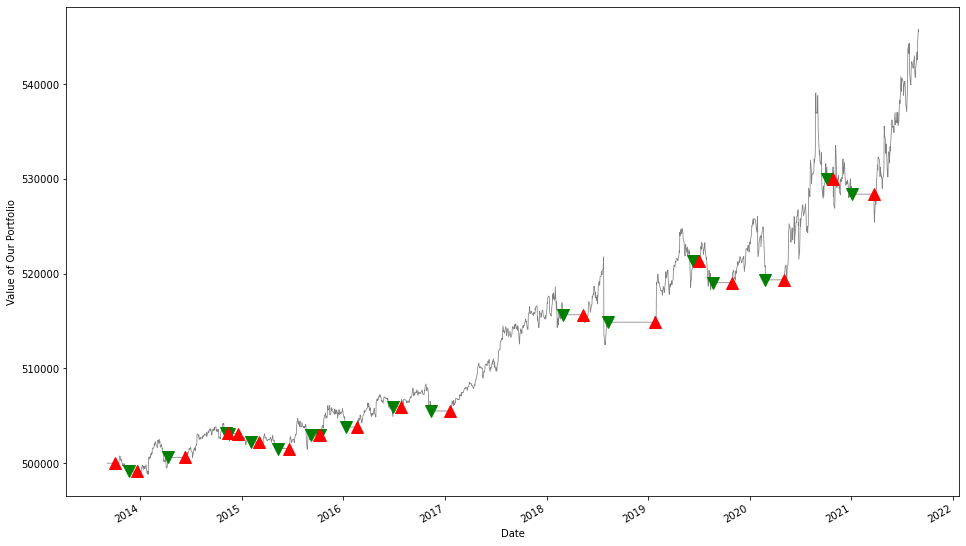

In [47]:
fig = plt.figure(figsize = (16, 10))

sub = fig.add_subplot(111,
                      ylabel = "Value of Our Portfolio")

# EQUITY CURVE
our_portfolio["total"].plot(ax = sub,
                            color = "grey",
                            lw = 0.75)

# Plot sell trades
sub.plot(our_portfolio.loc[BUY_or_SELL.our_positions == -1.0].index,
         our_portfolio.total[BUY_or_SELL.our_positions == -1.0],
         "v",
         markersize = 12,
         color = "green")

# Plot buy trades
sub.plot(our_portfolio.loc[BUY_or_SELL.our_positions == 1.0].index,
         our_portfolio.total[BUY_or_SELL.our_positions == 1.0],
         "^",
         markersize = 12,
         color = "red")

> Now we have learned a trading strategy and backtested it. 

> Note that this is not the end of your trading strategy learning. You might want to improve your strategy. 

> Later in the semester you will learn `how to improve the model`, `using machine learning algorithms` such as `KMeans`, `k-Nearest Neighbors (KNN)`, and `Classification` or `Regression Trees`.

> You might want to improve your trading strategy by working with multi-symbol portfolios. As we’ll discuss when assessing our moving average crossover strategy, incorporating only one company or symbol into your strategy rarely provides much information.

> You should use a risk management framework or event-driven backtesting to help mitigate the foresight (lookahead) bias.

### Performance Metrics: Assessing Our Moving Average Crossover Strategy

> Let’s quickly assess our simple trading strategy by utilizing what pandas offers:

- `Sharpe ratio`;
- `maximum drawdown`;
- `compound annual growth rate (CAGR)`

> Let’s start with the Sharpe ratio. Here, we won’t take the `risk-free rate` in estimating it.

> Please extend the original trading strategy with more data (from other companies), when using Sharpe ratio.

In [48]:
Sharp = np.sqrt(253) * our_portfolio["returns"].mean() / our_portfolio["returns"].std()

Sharp

0.637177198746123

> Sharpe ratio is often compared to other stocks. Please extend the original trading strategy with more data (from other companies).

> Maximum drawdown is for measuring the largest single drop, from peak to bottom, in the value of a portfolio ahead of a new peak being achieved. The metric denotes the risk of a portfolio chosen according to a certain strategy.

In [49]:
window = 253

ROLL_MAX = FB["Adj Close"].rolling(window = window,
                                   min_periods = 1).max()

DAILY_DRAWDOWN = FB["Adj Close"] / ROLL_MAX - 1.0

MAX_DAILY_DRAWDOWN = DAILY_DRAWDOWN.rolling(window = window,
                                            min_periods = 1).min()

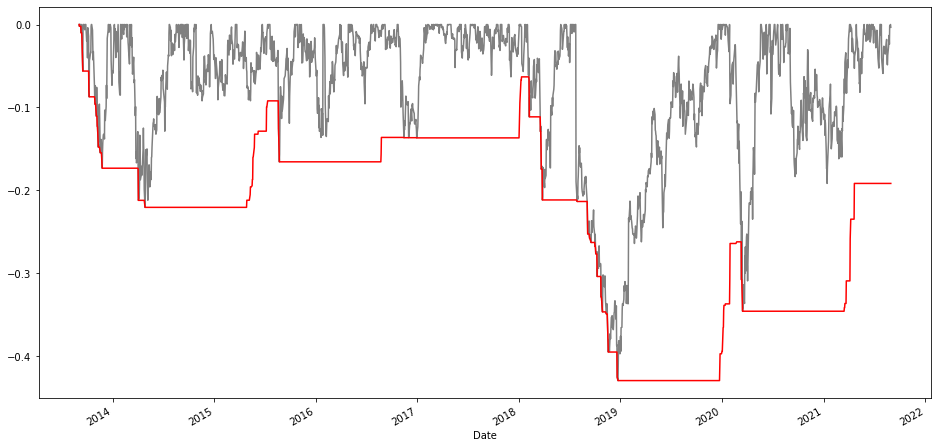

In [50]:
fig = plt.figure(figsize = (16, 8))

DAILY_DRAWDOWN.plot(color = "grey")
MAX_DAILY_DRAWDOWN.plot(color = "red") # This is what we are caring about HERE.

plt.show()

> CAGR gives us a constant rate of return over a time period. 

The rate tells you what you really have at the end of your investment period.

- First, let’s calculate CAGR by dividing the investment’s ending value (EV) by its beginning value (BV).
- Then, raise the result to the power of 1/n, where n is the number of periods.
- Subtract 1 from the result. This is the CAGR.

> conpound annual growth rate = (ending value(EV) / beginning value(BV))^1/n - 1
> $$ CAGR = (EV/BV)^{1/n}-1 $$

In [51]:
Days = (FB.index[-1] - FB.index[0]).days

CAGR = (((FB["Adj Close"][-1]) / (FB["Adj Close"][0]))**(365/Days)) - 1

CAGR

0.3173082898000581

### 🎁 BONUS: Towards a more object-oriented design with classes

In [52]:
!pip install backtesting

In [53]:
from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply

/Users/xiezijun/Documents/anaconda/anaconda3/lib/python3.8/site-packages/backtesting/_plotting.py:47: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [54]:
AAPL = yf.download("AAPL",
                   start = "2015-09-01",
                   end = "2021-08-31",
                   auto_adjust = True)

[*********************100%***********************]  1 of 1 completed


In [55]:
def RSI(array, n):
    G = pd.Series(array).diff()
    L = G.copy()
    G[G<0] = 0
    L[L>0] = 0
    relative_strength = G.ewm(n).mean() / L.abs().ewm(n).mean()
    return 100 - 100 / (1 + relative_strength)

# RSI >70 over bought, <30 over sell

In [56]:
def SMA(array, n):
    """Simple Moving Average"""
    return pd.Series(array).rolling(n).mean()

In [57]:
# ???
class System(Strategy):
    daily_RSI = 30
    weekly_RSI = 30
    LEVEL = 70
    
    def init(self):
        self.ma10 = self.I(SMA, self.data.Close, 10)
        self.ma20 = self.I(SMA, self.data.Close, 20)
        self.ma50 = self.I(SMA, self.data.Close, 50)
        self.ma100 = self.I(SMA, self.data.Close, 100)
        
        self.d_rsi = self.I(RSI, self.data.Close, self.daily_RSI) 
        
        self.w_rsi = resample_apply("W-FRI", RSI, self.data.Close, self.weekly_RSI)
        
    def next(self):
        PRICE = self.data.Close[-1]
        
        if (not self.position and
                self.d_rsi[-1] > self.LEVEL and 
                self.w_rsi[-1] > self.LEVEL and 
                self.w_rsi[-1] > self.d_rsi[-1] and 
                self.ma10[-1] > self.ma20[-1] > self.ma50[-1] > self.ma100[-1] and 
                PRICE > self.ma10[-1]):
            
                self.buy(sl = 0.92 * PRICE)
                
        elif PRICE < 0.98 * self.ma10[-1]: 
            self.position.close()

In [59]:
BACKTEST = Backtest(AAPL, System, commission = 0.002)

In [60]:
%%time

BACKTEST.optimize(daily_RSI = range(10, 35, 5),
                  weekly_RSI = range(10, 35, 5),
                  LEVEL = range(30, 80, 10)
                  )

/Users/xiezijun/Documents/anaconda/anaconda3/lib/python3.8/site-packages/backtesting/backtesting.py:1374: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/9 [00:00<?, ?it/s]

CPU times: user 5.64 s, sys: 62.5 ms, total: 5.71 s
Wall time: 6.07 s


Start                     2015-08-31 00:00:00
End                       2021-08-30 00:00:00
Duration                   2191 days 00:00:00
Exposure Time [%]                     6.94904
Equity Final [$]                 12347.572161
Equity Peak [$]                  13791.614134
Return [%]                          23.475722
Buy & Hold Return [%]              491.555562
Return (Ann.) [%]                    3.579473
Volatility (Ann.) [%]                 6.92364
Sharpe Ratio                         0.516993
Sortino Ratio                        0.772747
Calmar Ratio                         0.341865
Max. Drawdown [%]                  -10.470435
Avg. Drawdown [%]                   -2.565823
Max. Drawdown Duration      965 days 00:00:00
Avg. Drawdown Duration      124 days 00:00:00
# Trades                                    3
Win Rate [%]                            100.0
Best Trade [%]                      11.619326
Worst Trade [%]                      4.023832
Avg. Trade [%]                    

In [61]:
BACKTEST.plot()

Row(id='1606', ...)

#### Cautionary Tales

> Beyond testing a trading strategy, backtesting tests it on relevant historical data to see if it is a viable strategy before you make any moves. With backtesting, you can simulate and analyze the risk and profitability of trading with a specific strategy over a period of time.

But keep in mind that backtesting has some limitations.

- There could be external events, such as market regime shifts, which are regulatory changes or macroeconomic events, which will affect your backtesting.
- Liquidity constraints, such as a ban on short sales, could also influence your backtesting.
- You could overfit a model (optimization bias) when you ignore strategy rules because you think it’s better like that (interference), or you could accidentally introduce information into past data (foresight bias).

#### Later in our class

> Later, you will learn how to use toolkits other than pandas. NumPy and SciPy provide vectorization, optimization, and linear algebra. These can be of substantial help when developing trading strategies.

> You will also learn statsmodels and Scikit-Learn, and you’ll be working with forecasting strategies with machine learning and time series analysis. Stay tuned 🙂

> `Thank you for working with the script, Team 👍`